## CPE 695:  HW 5

Chloe Quinto    
HW 5   
April 30 2020    
*I pledge my honor that I have abided by the Stevens Honor System* - Chloe Quinto  


### Pre-Processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
noise_scale = 100
number_of_samples = 50 
x = 25 *(np.random.rand(number_of_samples,1)-0.8)
y = 5*x + 20*x**2+1*x**3+noise_scale*np.random.randn(number_of_samples,1)

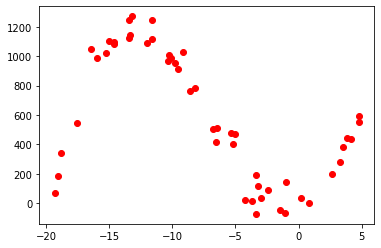

In [3]:
plt.plot(x,y,'ro')
plt.show()

Flatten np arrays to list 

In [4]:
x = np.array(x).flatten().tolist()
y = np.array(y).flatten().tolist()

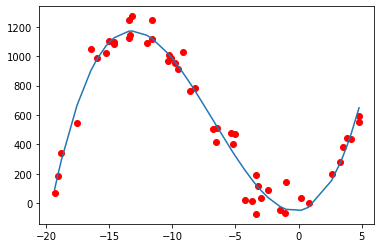

In [5]:
coeff = np.polyfit(x,y,3) 
poly = np.poly1d(coeff)

plt.plot(x,y, 'ro')
sortMe = np.sort(x) 

plt.plot(sortMe, poly(sortMe)) 
plt.show()

## 2. Genetic Algorithm 

1. Formula is y = ax<sup>3</sup> + bx<sup>2</sup> + cx+ d
2. Genes are a, b, c, and d
3. Chromosomes are [a,b,c,d]
4. For one array   
&nbsp;&nbsp;&nbsp; a. for every actual point(x,y)   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; i. Compute y'=ax<sup>3</sup> + bx<sup>2</sup> + cx+ d    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ii. Find the sum of (y-y')<sup>2</sup> over all    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; iii. Sum is your measure of "badness" (larger numbers are worse) 


In [6]:
import random
chromosomes = []
for i in range(100): 
    chromosome = [random.randint(0,100) for i in range(4)]
    chromosomes.append(chromosome)
    
chromosomes

[[73, 31, 0, 71],
 [12, 65, 93, 37],
 [68, 1, 70, 80],
 [59, 17, 66, 18],
 [8, 35, 26, 46],
 [0, 26, 0, 34],
 [24, 40, 92, 16],
 [34, 1, 79, 51],
 [58, 40, 53, 47],
 [71, 92, 89, 85],
 [14, 27, 82, 37],
 [81, 18, 28, 64],
 [100, 97, 62, 36],
 [79, 3, 91, 10],
 [12, 72, 100, 62],
 [30, 96, 58, 23],
 [21, 33, 25, 56],
 [80, 51, 21, 100],
 [51, 37, 86, 14],
 [57, 88, 78, 88],
 [71, 98, 50, 80],
 [92, 47, 30, 77],
 [33, 90, 82, 13],
 [26, 3, 26, 24],
 [90, 77, 78, 67],
 [62, 18, 42, 54],
 [30, 32, 66, 15],
 [32, 98, 88, 42],
 [29, 25, 91, 67],
 [4, 6, 98, 79],
 [57, 8, 70, 56],
 [14, 32, 21, 93],
 [15, 37, 5, 82],
 [77, 20, 45, 36],
 [1, 100, 59, 79],
 [45, 66, 89, 28],
 [90, 58, 57, 40],
 [51, 17, 9, 2],
 [9, 26, 23, 77],
 [31, 53, 26, 3],
 [37, 79, 16, 62],
 [31, 35, 81, 14],
 [1, 13, 94, 76],
 [78, 29, 84, 82],
 [8, 12, 99, 35],
 [6, 88, 23, 53],
 [93, 79, 65, 69],
 [86, 52, 7, 23],
 [81, 94, 39, 86],
 [49, 36, 14, 95],
 [82, 32, 57, 72],
 [22, 86, 29, 2],
 [82, 6, 100, 84],
 [40, 18, 2

In [7]:
points = []
seen = set()
generation = 500 

In [8]:
def yval(i): 
    '''
    Calculates formula y = ax^3 + bx^2 + cx + d 
    '''
    return chromosomes[i][0]*(x[i]**3) + chromosomes[i][1]*(x[i]**2) + chromosomes[i][2]*(x[i])+ chromosomes[i][3]


In [9]:
i, j = 0,1 
points = []
seen = set()
while j < len(x): 
    y = yval(i)
    y_hat = yval(j)

    badness = (y - y_hat)**2 

    points.append((chromosomes[i], round(badness)))
    
    if tuple(chromosomes[i]) in seen: 
        pass
    else: 
        seen.add(tuple(chromosomes[i]))
        genes = sorted(points, key = lambda x: float(x[1]), reverse = False)
        
    
    
    j += 1 
    i += 1 
genes = genes[:10]


([4, 6, 98, 79], 391600)
([8, 35, 26, 46], 767677)
([34, 1, 79, 51], 1325281)
([15, 37, 5, 82], 2920585)
([30, 96, 58, 23], 3667422)
([31, 35, 81, 14], 9546081)
([9, 26, 23, 77], 12239912)
([14, 27, 82, 37], 15509998)
([68, 1, 70, 80], 40965895)
([62, 18, 42, 54], 51632846)


## 3. Creating Mutations 

In [21]:
mutations = []
curr = []
for i in range(len(genes)): 
    og = genes[i][0]
    curr.append(i)
    curr.append(og.copy())
    for j in range(9): 

        new = og.copy()
        rand_idx = random.randrange(len(new))
        rand_num = new[rand_idx]
        rand_float = random.uniform(0,1)
        new_num = round(rand_num * rand_float)
        new[rand_idx] = new_num
        curr.append(new)
    print(curr)
    print("\n")
    mutations.append(curr)
    curr = []

[0, [4, 6, 98, 79], [4, 6, 98, 79], [4, 5, 98, 79], [4, 6, 49, 79], [4, 6, 98, 79], [3, 6, 98, 79], [4, 6, 98, 79], [4, 6, 98, 79], [1, 6, 98, 79], [4, 6, 98, 1]]


[1, [8, 35, 26, 46], [8, 18, 26, 46], [8, 35, 15, 46], [8, 35, 26, 25], [8, 35, 26, 44], [8, 35, 26, 46], [8, 31, 26, 46], [8, 35, 26, 2], [8, 35, 26, 26], [8, 35, 4, 46]]


[2, [34, 1, 79, 51], [24, 1, 79, 51], [8, 1, 79, 51], [34, 1, 2, 51], [34, 1, 73, 51], [14, 1, 79, 51], [34, 1, 79, 51], [34, 1, 30, 51], [34, 1, 11, 51], [34, 1, 75, 51]]


[3, [15, 37, 5, 82], [15, 11, 5, 82], [15, 10, 5, 82], [15, 36, 5, 82], [15, 37, 5, 13], [15, 37, 2, 82], [15, 31, 5, 82], [15, 37, 3, 82], [15, 37, 5, 32], [9, 37, 5, 82]]


[4, [30, 96, 58, 23], [30, 96, 58, 1], [30, 96, 11, 23], [5, 96, 58, 23], [22, 96, 58, 23], [30, 18, 58, 23], [30, 8, 58, 23], [30, 96, 58, 13], [30, 96, 25, 23], [30, 96, 51, 23]]


[5, [31, 35, 81, 14], [31, 19, 81, 14], [31, 35, 75, 14], [20, 35, 81, 14], [31, 6, 81, 14], [31, 35, 81, 2], [21, 35, 81, 14], [